# Probability of passing exam (Part 1)



**Task 1 A**

Out of 69 topics, 5 are randomly given to a student that has prepared 20. 

To calculate the probability that the student knows at least 1 of the 5 given topics, we first calculate the probability that the student does not know either of them:

(49/69) * (48/68) * (47/67) * (46/66) * (45/65)

Since with every new topic the selection gets smaller, the number of unknown topics and the total number of topics also get smaller. Finally, we subtract the probability of not knowing either of the topics from 1:


1 - (49/69) * (48/68) * (47/67) * (46/66) * (45/65) = 0.8303259514848628

Therefore, the probability of a student who has learned 20 out of 69 topics to pass the exam by knowing at least 1 is ~ **0.83**

**Task 1 B**

In [ ]:
import random
from random import sample
import matplotlib.pyplot as plt

In [ ]:

def exam_probability(number_of_topics, known_topics, chosen_topics = 5):
    list_of_topics = sample(range(1, 69), chosen_topics)
    known_topics = sample(range(1, 69), known_topics)
    result=list(set(list_of_topics) & set(known_topics))
    if len(result) > 0:
      exam_probability = True
    else:
      exam_probability = False
    return exam_probability
    


In [ ]:
def monte_carlo(num_simulations, number_of_topics, known_topics, max_num_rolls = 1): 
  win_probability = []
  for i in range(num_simulations):
    num_rolls = [0]
    num_wins = 0

    while num_rolls[-1] < max_num_rolls:
        same = exam_probability(number_of_topics, known_topics) #number of topics, and number of topics which is known by student
        if same:
            num_wins += 1
        else:
            pass

        num_rolls.append(num_rolls[-1] + 1)
    win_probability.append(num_wins/num_rolls[-1])

  overall_win_probability = sum(win_probability)/len(win_probability)

  print("Average exam passing probability after " + str(num_simulations) + " runs for " + str(known_topics) + " known topics: " + str(overall_win_probability))

In [ ]:
monte_carlo(1000000, 69, 20)

Average exam passing probability after 1000000 runs for 20 known topics: 0.836144


Our script outputs almost the same result as our manual calculation, which means that we did everything right.
Let's check what would be our probability to pass the exam if we only knew 15 topics instead of 20

In [ ]:
monte_carlo(1000000, 69, 15)

Average exam passing probability after 1000000 runs for 15 known topics: 0.725608


# Classification (Part 2)

**Task 2**

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/T.CON/skydata.csv")
data[:5]

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,class,fiberid,rerun,i,mjd
0,2.803170,19.35065,0.142265,16.32664,17.04886,182.898466,1458,583309923396381000,388,518,4,17.89648,1237651736831980000,STAR,341,301,16.63305,52282
1,23.891666,17.57148,0.000032,15.88743,16.04065,270.240850,4832,2471445199432210000,126,2195,3,16.38217,1237666227497600000,GALAXY,345,301,15.92649,54234
2,14.323357,18.30611,0.073976,15.00599,15.73859,138.913885,5935,2742700762298610000,151,2436,4,16.52253,1237670965385040000,STAR,31,301,15.32356,54054
3,6.157200,19.52862,0.040765,16.13952,16.88640,159.998722,2986,1125959874568550000,276,1000,2,17.74360,1237658298460930000,STAR,218,301,16.48322,52643
4,-0.395033,18.91353,0.000084,17.14535,17.36865,181.624546,6793,363748710133295000,140,323,3,17.80134,1237674649929380000,GALAXY,302,301,17.21479,51615


In [ ]:
data.shape

(80000, 18)

Separating dataset in 2 parts: GALAXY and STAR. This will allow us to study separately the components of each of them.


In [ ]:
galaxy = data.loc[data['class'] == 'GALAXY']
star = data.loc[data['class'] == 'STAR']

Let's check first if our dataset contains missing values (missing values could affect the final result of our research)

In [ ]:
data.isnull().sum()

dec          0
u            0
redshift     0
z            0
r            0
ra           0
run          0
specobjid    0
field        0
plate        0
camcol       0
g            0
objid        0
class        0
fiberid      0
rerun        0
i            0
mjd          0
dtype: int64

Since we do not have any missing values let's also check data for duplicates.

In [ ]:
data.duplicated(subset = ['dec','u','redshift','z','r','ra','run','specobjid','field','plate','camcol','g','objid','class','fiberid','rerun','i','mjd'])

0        False
1        False
2        False
3        False
4        False
         ...  
79995    False
79996    False
79997    False
79998    False
79999    False
Length: 80000, dtype: bool

Well our data is totally clear!
Now we can move forward to research.

**General information about the dataset**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from matplotlib.pyplot import figure

Let's see how many stars and galaxies are in our dataset.

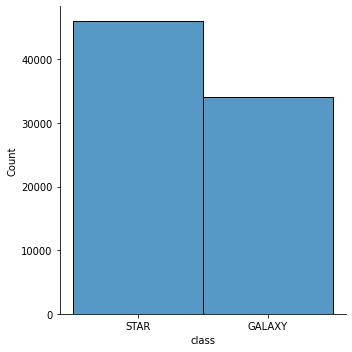

In [ ]:
sns.displot(data['class'], binwidth = 1)

plt.show()

And exact number of them

In [ ]:
data['class'].value_counts()

STAR      46004
GALAXY    33996
Name: class, dtype: int64

**Impactful values**

In this part we will check which of the values will be most impactful during the modeling 




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dec        80000 non-null  float64
 1   u          80000 non-null  float64
 2   redshift   80000 non-null  float64
 3   z          80000 non-null  float64
 4   r          80000 non-null  float64
 5   ra         80000 non-null  float64
 6   run        80000 non-null  int64  
 7   specobjid  80000 non-null  uint64 
 8   field      80000 non-null  int64  
 9   plate      80000 non-null  int64  
 10  camcol     80000 non-null  int64  
 11  g          80000 non-null  float64
 12  objid      80000 non-null  int64  
 13  class      80000 non-null  object 
 14  fiberid    80000 non-null  int64  
 15  rerun      80000 non-null  int64  
 16  i          80000 non-null  float64
 17  mjd        80000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 11.0+ MB


In [ ]:
data.describe()

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,fiberid,rerun,i,mjd
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.0,80000.000000,80000.000000
mean,24.956199,18.599217,0.044789,16.249336,16.688952,177.743131,3959.174013,2.752467e+18,187.312775,2444.599575,3.275537,17.255286,1.237662e+18,336.434625,301.0,16.417453,53832.966075
std,20.684056,0.850213,0.053003,1.144420,1.013888,77.896889,1673.864207,2.247970e+18,141.263033,1996.584854,1.623022,0.906773,7.189191e+12,212.623680,0.0,1.074750,1441.947194
min,-19.495456,10.611810,-0.004136,8.947795,9.005167,0.013061,109.000000,2.994897e+17,11.000000,266.000000,1.000000,9.988000,1.237646e+18,1.000000,301.0,8.848403,51608.000000
25%,6.592120,18.151283,-0.000033,15.533245,16.112177,135.892460,2826.000000,1.334297e+18,85.000000,1185.000000,2.000000,16.763295,1.237658e+18,158.000000,301.0,15.781940,52731.000000
50%,23.710118,18.836250,0.033506,16.264470,16.754960,180.537028,3900.000000,2.319509e+18,153.000000,2060.000000,3.000000,17.414850,1.237662e+18,324.000000,301.0,16.453590,53712.000000
75%,40.306610,19.253073,0.078770,16.994713,17.392215,224.576979,5060.000000,3.221323e+18,249.000000,2861.000000,5.000000,17.907175,1.237667e+18,496.000000,301.0,17.129413,54567.000000
max,84.490494,19.599950,1.945427,29.383740,31.990100,359.973933,8162.000000,1.314852e+19,982.000000,11678.000000,6.000000,19.996050,1.237681e+18,1000.000000,301.0,32.101780,58543.000000


Let's take a look at most popular values in the fiberid column

In [ ]:
y = data['fiberid'].value_counts().index.tolist()[:5]
x = data['fiberid'].value_counts()[:5]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


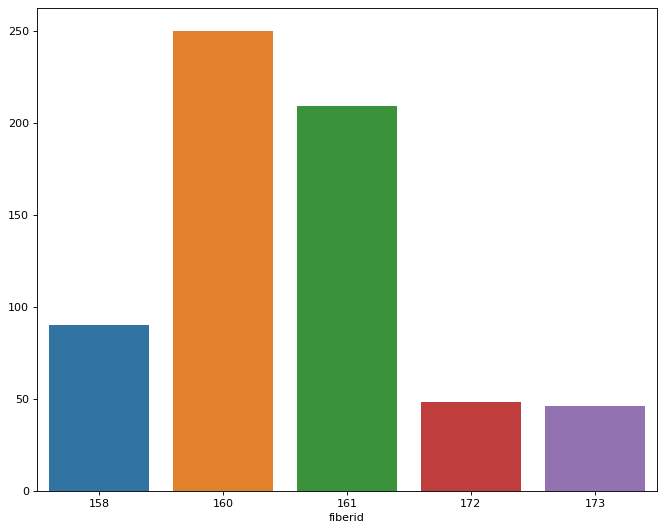

In [ ]:
figure(figsize=(10, 8), dpi=80)
sns.barplot(x, y)

plt.show()

Now we have an overview of the data, and we can start exploring it.
We will do a simple comparison for STAR and GALAXY datasets which were created previously. We will take some of the columns and count the average value for each dataset and then compare them. It will show us how the average values are different  between STAR and GALAXY.

Average objid for galaxy and star dataframes 

In [ ]:
average_objid_galaxy = sum(galaxy['objid'])/len(galaxy['objid']) 
average_objid_galaxy

1.237663384987423e+18

In [ ]:
average_objid_star = sum(star['objid'])/len(star['objid']) 
average_objid_star

1.2376618093036582e+18

Average ra for galaxy and star dataframes

In [ ]:
average_ra_galaxy = sum(galaxy['ra'])/len(galaxy['ra'])
average_ra_galaxy

171.85392179049154

In [ ]:
average_ra_star = sum(star['ra'])/len(star['ra']) 
average_ra_star

182.0951335303255

Average dec for galaxy and star dataframes

In [ ]:
average_dec_galaxy = sum(galaxy['dec'])/len(galaxy['dec']) 
average_dec_galaxy

25.14225488980057

In [ ]:
average_dec_star = sum(star['dec'])/len(star['dec']) 
average_dec_star

24.818707607649827

Average fiberid for galaxy and star dataframes

In [ ]:
average_dec_galaxy = sum(galaxy['fiberid'])/len(galaxy['fiberid']) 
average_dec_galaxy

359.27053182727377

In [ ]:
average_dec_star = sum(star['fiberid'])/len(star['fiberid']) 
average_dec_star

319.5593644030954

We can see that the difference in **objid** and **dec** columns is not that significant, which means it won't affect the model's decision so much.
Meanwhile, the difference in **fiberid** and **ra** columns is more noticable, then the model should be more dependant on these values  

**Preparing data for modeling**

Creating a copy of dataset

In [ ]:
X_train = data.copy()

In [ ]:
X_train

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,class,fiberid,rerun,i,mjd
0,2.803170,19.35065,0.142265,16.32664,17.04886,182.898466,1458,583309923396381000,388,518,4,17.89648,1237651736831980000,STAR,341,301,16.63305,52282
1,23.891666,17.57148,0.000032,15.88743,16.04065,270.240850,4832,2471445199432210000,126,2195,3,16.38217,1237666227497600000,GALAXY,345,301,15.92649,54234
2,14.323357,18.30611,0.073976,15.00599,15.73859,138.913885,5935,2742700762298610000,151,2436,4,16.52253,1237670965385040000,STAR,31,301,15.32356,54054
3,6.157200,19.52862,0.040765,16.13952,16.88640,159.998722,2986,1125959874568550000,276,1000,2,17.74360,1237658298460930000,STAR,218,301,16.48322,52643
4,-0.395033,18.91353,0.000084,17.14535,17.36865,181.624546,6793,363748710133295000,140,323,3,17.80134,1237674649929380000,GALAXY,302,301,17.21479,51615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,58.093491,19.36814,0.102927,16.57812,17.29029,179.797354,2826,1477349224591940000,276,1312,5,18.03106,1237657612876780000,STAR,613,301,16.86924,52781
79996,2.612478,18.71973,0.000426,17.33746,17.49476,151.950921,1462,5334601264587360000,178,4738,5,17.78212,1237651754534960000,GALAXY,318,301,17.36612,55650
79997,29.385913,18.62474,0.057637,15.65200,16.30223,116.238594,2822,1000975639395720000,56,889,3,17.06923,1237657594608750000,STAR,184,301,15.92962,52663
79998,66.773361,18.04600,0.000060,15.79832,16.14084,117.910037,5060,3314804157889670000,167,2944,5,16.69588,1237667207826570000,GALAXY,563,301,15.91642,54523


Let's transform values GALAXY and STAR to digits format, so we can use this data in further processing (STAR->1,GALAXY->0)

In [ ]:
X_train = X_train.replace({'class':{'STAR':1, 'GALAXY':0}}) 
X_train

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,class,fiberid,rerun,i,mjd
0,2.803170,19.35065,0.142265,16.32664,17.04886,182.898466,1458,583309923396381000,388,518,4,17.89648,1237651736831980000,1,341,301,16.63305,52282
1,23.891666,17.57148,0.000032,15.88743,16.04065,270.240850,4832,2471445199432210000,126,2195,3,16.38217,1237666227497600000,0,345,301,15.92649,54234
2,14.323357,18.30611,0.073976,15.00599,15.73859,138.913885,5935,2742700762298610000,151,2436,4,16.52253,1237670965385040000,1,31,301,15.32356,54054
3,6.157200,19.52862,0.040765,16.13952,16.88640,159.998722,2986,1125959874568550000,276,1000,2,17.74360,1237658298460930000,1,218,301,16.48322,52643
4,-0.395033,18.91353,0.000084,17.14535,17.36865,181.624546,6793,363748710133295000,140,323,3,17.80134,1237674649929380000,0,302,301,17.21479,51615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,58.093491,19.36814,0.102927,16.57812,17.29029,179.797354,2826,1477349224591940000,276,1312,5,18.03106,1237657612876780000,1,613,301,16.86924,52781
79996,2.612478,18.71973,0.000426,17.33746,17.49476,151.950921,1462,5334601264587360000,178,4738,5,17.78212,1237651754534960000,0,318,301,17.36612,55650
79997,29.385913,18.62474,0.057637,15.65200,16.30223,116.238594,2822,1000975639395720000,56,889,3,17.06923,1237657594608750000,1,184,301,15.92962,52663
79998,66.773361,18.04600,0.000060,15.79832,16.14084,117.910037,5060,3314804157889670000,167,2944,5,16.69588,1237667207826570000,0,563,301,15.91642,54523


**Compose the sets X and y**

In [ ]:
y = X_train['class']
X = X_train[['dec','u','redshift','z','r','ra','run','specobjid','field','plate','camcol','g','objid','fiberid','rerun','i','mjd']]

In [ ]:
X.head()

,dec,u,redshift,z,r,ra,run,specobjid,field,plate,camcol,g,objid,fiberid,rerun,i,mjd
0,2.803170,19.35065,0.142265,16.32664,17.04886,182.898466,1458,583309923396381000,388,518,4,17.89648,1237651736831980000,341,301,16.63305,52282
1,23.891666,17.57148,0.000032,15.88743,16.04065,270.240850,4832,2471445199432210000,126,2195,3,16.38217,1237666227497600000,345,301,15.92649,54234
2,14.323357,18.30611,0.073976,15.00599,15.73859,138.913885,5935,2742700762298610000,151,2436,4,16.52253,1237670965385040000,31,301,15.32356,54054
3,6.157200,19.52862,0.040765,16.13952,16.88640,159.998722,2986,1125959874568550000,276,1000,2,17.74360,1237658298460930000,218,301,16.48322,52643
4,-0.395033,18.91353,0.000084,17.14535,17.36865,181.624546,6793,363748710133295000,140,323,3,17.80134,1237674649929380000,302,301,17.21479,51615


In [ ]:
y

0        1
1        0
2        1
3        1
4        0
        ..
79995    1
79996    0
79997    1
79998    0
79999    0
Name: class, Length: 80000, dtype: int64

**Split the dataset into samples**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1810, stratify=y)

In [ ]:
print(X.shape)
print(X_train.shape) 
print(X_test.shape)

(80000, 17)
(64000, 17)
(16000, 17)


Build a **Decision Tree** model

This model was chosen because of its obvious advantages, such as: 
1. Able to handle both numerical and categorical data. 
2. Requires little data preparation.
3. Possible to validate a model using statistical tests.
4. Decision trees can approximate any Boolean function

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=4)
# train the model
model.fit(X_train, y_train)

# get predictions
y_pred = model.predict(X_test)

# measure the quality of the model
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.9969375


As you can see from the result, the model quite accurately predicted all the sample provided to it, this tells us about 3 things: the data is clean, the chosen model did a good perfomance with the task given to it

**Matrix of errors**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6762,   37],
       [  12, 9189]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(6762, 37, 12, 9189)

In [ ]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score

In [ ]:
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9986957939354418
0.995989594623889


**ROC_AUC (measuring correctness)**

AUC stands for area under the ROC Curve. That is AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9966269085870768


Now let's visualize the AUC metric

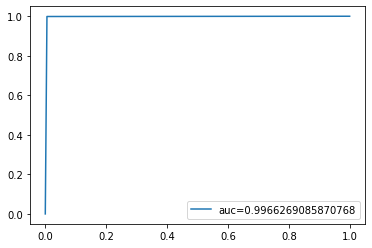

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Visualizing a desicion tree**

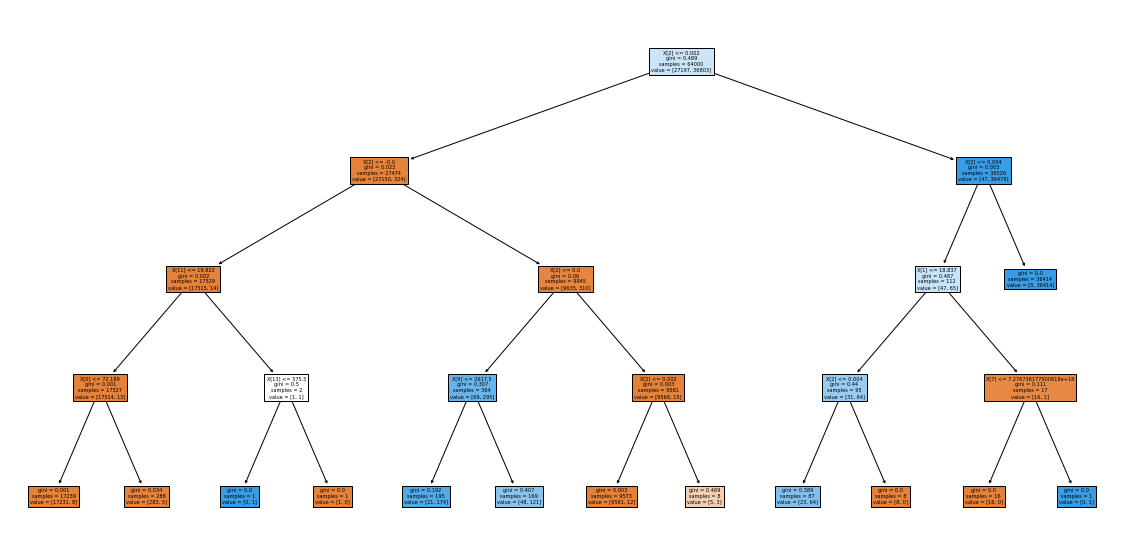

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()

**Conclusion**

It was fun.

The fact that a clean dataset was provided and all with numerical data (except for the **class**) made the task much easier for me and for the selected model succeed in task.

According to the results we got at the output, we can say that the chosen model .

If the accuracy indicator were lower, then in this case it would be useful to look at the performance of other models, but since everything turned out well the first time (in which the pure dataset played an important role), there is no point in using other models. 

Among other things, if the accuracy indicator were not so high, then one could try to remove columns that did not differ much in average values ​​(for example, **dec** or **objid**), but this also makes no sense, at least within the framework of this task.
